In [1]:
library("dplyr")
library("Seurat")
library("patchwork")
library("ggplot2")
library("clustree")
library("MAST")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘Seurat’ was built under R version 4.5.2”
Loading required package: SeuratObject

Warning message:
“package ‘SeuratObject’ was built under R version 4.5.2”
Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Warning message:
“package ‘ggplot2’ was built under R version 4.5.2”
Loading required package: ggraph


Attaching package: ‘ggraph’


The following object is masked from ‘package:sp’:

    geometry


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count

In [2]:
day0_Seurat1 = readRDS("../seurat_objects/Day0_preprocess.rds")

In [3]:
day0_Seurat1

An object of class Seurat 
16822 features across 521 samples within 1 assay 
Active assay: RNA (16822 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 dimensional reduction calculated: pca

#### Bonferroni is used for multiple hypothesis corrections

In [4]:
#resolution
# Value of the resolution parameter, use a value above (below) 
# 1.0 if you want to obtain a larger (smaller) number of communities.
day0_Seurat1 = FindNeighbors(day0_Seurat1, dims = 1:50)
day0_Seurat1 = FindClusters(day0_Seurat1, resolution = 2.6)

Computing nearest neighbor graph

Warning message:
“package ‘future’ was built under R version 4.5.2”
Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 521
Number of edges: 16451

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.5564
Number of communities: 13
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
16:04:30 UMAP embedding parameters a = 0.9922 b = 1.112

16:04:30 Read 521 rows and found 50 numeric columns

16:04:30 Using Annoy for neighbor search, n_neighbors = 30

16:04:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:04:30 Writing NN index file to temp file /var/folders/t9/tm6czqy15131vrjm3_cwgw9h0000gp/T//RtmpDYbknA/file177393b510b47

16:04:30 Searching Annoy index using 1 thread, search_k = 3000

16:04:30 Annoy recall = 100%

16:04:30 Commencing smooth kNN distance calibrat

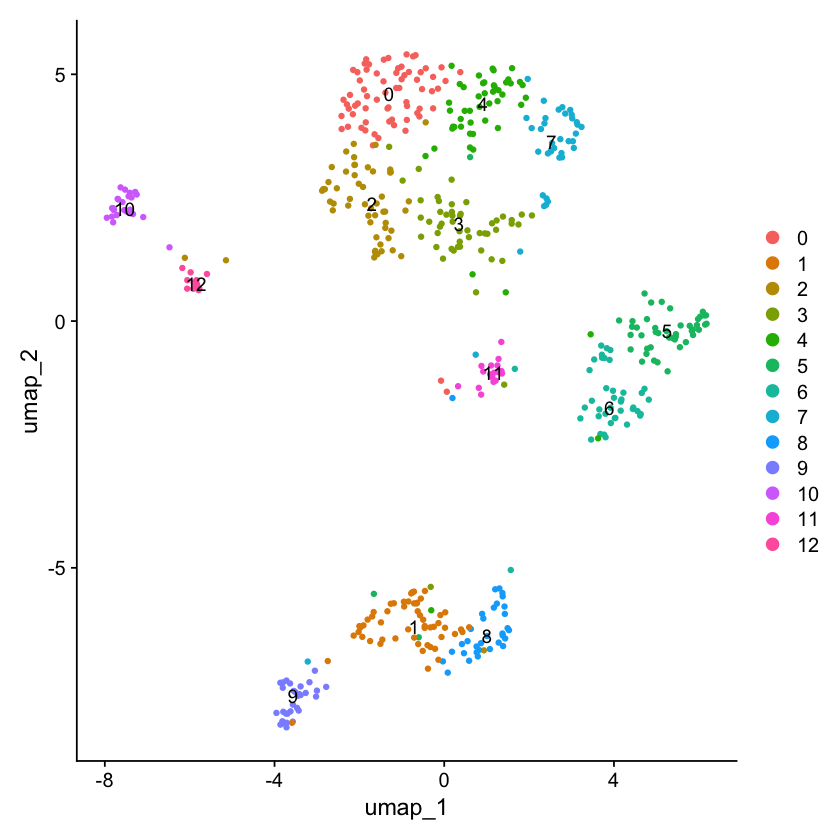

In [5]:
day0_Seurat1 = RunUMAP(day0_Seurat1, dims = 1:50)
UMAP_plot1 = DimPlot(day0_Seurat1, reduction = "umap", label = TRUE)
print(UMAP_plot1)

### Perform DE analysis without pseudobulking

In [7]:
# Find DE genes between cluster 0 and all other clusters
# using Mann-Whitney U test
day0_cluster0_DE_Mann_Whitney = FindMarkers(object = day0_Seurat1, 
                                            ident.1 = "0", 
                                            test.use = "wilcox")
day0_cluster0_DE_Mann_Whitney$Gene = rownames(day0_cluster0_DE_Mann_Whitney)
day0_cluster0_DE_Mann_Whitney = day0_cluster0_DE_Mann_Whitney[,c("Gene", "p_val", "avg_log2FC", "pct.1", "pct.2", "p_val_adj")]
head(day0_cluster0_DE_Mann_Whitney)

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Prdm8,Prdm8,1.588447e-40,6.008133,0.456,0.013,2.672085e-36
Mfap5,Mfap5,5.924811e-33,2.399630,1.000,0.523,9.966717e-29
Clec3b,Clec3b,2.558426e-31,2.063015,1.000,0.419,4.303785e-27
C3,C3,5.592993e-29,2.237671,0.941,0.316,9.408533e-25
1700019D03Rik,1700019D03Rik,4.011217e-27,3.233141,0.559,0.084,6.747670e-23
Fstl1,Fstl1,3.696874e-26,1.719181,0.985,0.702,6.218881e-22


In [8]:
# Find DE genes between cluster 0 and all other clusters
# using MAST
day0_cluster0_DE_MAST = FindMarkers(object = day0_Seurat1, 
                                    ident.1 = "0",
                                    test.use = "MAST")


 Completed [--------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   2% with 0 failures

 Completed [>-------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   4% with 0 failures

 Completed [=>------------------------------------------]   5% with 0 failures

 Completed [=>------------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   7% with 0 failures

 Completed [==>-----------------------------------------]   8% with 0 failures

 Completed [===>----------------------------------------]   8% with 0 failures

 Completed [===>-----------------------

In [9]:
day0_cluster0_DE_MAST$Gene = rownames(day0_cluster0_DE_MAST)
day0_cluster0_DE_MAST = day0_cluster0_DE_MAST[,c("Gene", "p_val", "avg_log2FC", "pct.1", "pct.2", "p_val_adj")]
head(day0_cluster0_DE_MAST)

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mfap5,Mfap5,1.088163e-39,2.399630,1.000,0.523,1.830508e-35
Clec3b,Clec3b,1.126831e-33,2.063015,1.000,0.419,1.895555e-29
Fbn1,Fbn1,1.636984e-33,2.382930,0.971,0.558,2.753734e-29
Fstl1,Fstl1,2.439138e-30,1.719181,0.985,0.702,4.103118e-26
Ddah2,Ddah2,4.228833e-29,1.868541,0.926,0.523,7.113742e-25
C3,C3,2.490568e-28,2.237671,0.941,0.316,4.189634e-24


In [10]:
#order by gene name and confirm they are equal
dim(day0_cluster0_DE_Mann_Whitney)
dim(day0_cluster0_DE_MAST)

day0_cluster0_DE_Mann_Whitney = day0_cluster0_DE_Mann_Whitney[order(day0_cluster0_DE_Mann_Whitney$Gene),]
head(day0_cluster0_DE_Mann_Whitney)

day0_cluster0_DE_MAST = day0_cluster0_DE_MAST[order(day0_cluster0_DE_MAST$Gene),]
head(day0_cluster0_DE_MAST)

table(day0_cluster0_DE_Mann_Whitney$Gene == day0_cluster0_DE_MAST$Gene)

[1] 12571     6

[1] 12571     6

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610007P14Rik,0610007P14Rik,0.005410699,0.6836203,0.397,0.236,1
0610009B22Rik,0610009B22Rik,0.265582715,0.3207232,0.221,0.170,1
0610009E02Rik,0610009E02Rik,0.473299340,1.5453196,0.015,0.007,1
0610009L18Rik,0610009L18Rik,0.468642504,-0.3239691,0.015,0.031,1
0610009O20Rik,0610009O20Rik,0.016877273,0.9968156,0.235,0.132,1
0610010F05Rik,0610010F05Rik,0.944719251,0.1414977,0.088,0.088,1


,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610007P14Rik,0610007P14Rik,0.02104327,0.6836203,0.397,0.236,1
0610009B22Rik,0610009B22Rik,0.60044112,0.3207232,0.221,0.170,1
0610009E02Rik,0610009E02Rik,0.81143877,1.5453196,0.015,0.007,1
0610009L18Rik,0610009L18Rik,0.46249297,-0.3239691,0.015,0.031,1
0610009O20Rik,0610009O20Rik,0.03171455,0.9968156,0.235,0.132,1
0610010F05Rik,0610010F05Rik,0.86177373,0.1414977,0.088,0.088,1



 TRUE 
12571 

In [11]:
# combine the results
day0_cluster0_results = data.frame(matrix(data = 0, nrow = nrow(day0_cluster0_DE_MAST), ncol = 6))
colnames(day0_cluster0_results) = c("Gene","ave_log2_FC","Mann_Whitney","Mann_Whitney_Adj","MAST","MAST_Adj")
day0_cluster0_results$Gene = day0_cluster0_DE_Mann_Whitney$Gene
day0_cluster0_results$ave_log2_FC = day0_cluster0_DE_Mann_Whitney$avg_log2FC
day0_cluster0_results$Mann_Whitney = day0_cluster0_DE_Mann_Whitney$p_val
day0_cluster0_results$Mann_Whitney_Adj = day0_cluster0_DE_Mann_Whitney$p_val_adj
day0_cluster0_results$MAST = day0_cluster0_DE_MAST$p_val
day0_cluster0_results$MAST_Adj = day0_cluster0_DE_MAST$p_val_adj

head(day0_cluster0_results)

# Order by fold-change
day0_cluster0_results = day0_cluster0_results[order(-day0_cluster0_results$ave_log2_FC),]
head(day0_cluster0_results)

,Gene,ave_log2_FC,Mann_Whitney,Mann_Whitney_Adj,MAST,MAST_Adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0610007P14Rik,0.6836203,0.005410699,1,0.02104327,1
2,0610009B22Rik,0.3207232,0.265582715,1,0.60044112,1
3,0610009E02Rik,1.5453196,0.473299340,1,0.81143877,1
4,0610009L18Rik,-0.3239691,0.468642504,1,0.46249297,1
5,0610009O20Rik,0.9968156,0.016877273,1,0.03171455,1
6,0610010F05Rik,0.1414977,0.944719251,1,0.86177373,1


,Gene,ave_log2_FC,Mann_Whitney,Mann_Whitney_Adj,MAST,MAST_Adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4579,Gm37086,6.342637,6.994271e-09,1.176576e-04,1.135168e-05,1.909579e-01
8618,Prdm8,6.008133,1.588447e-40,2.672085e-36,5.025098e-25,8.453219e-21
4539,Gm29096,5.606238,7.612734e-06,1.280614e-01,8.913515e-04,1.000000e+00
324,8430436N08Rik,5.586086,7.612734e-06,1.280614e-01,8.913515e-04,1.000000e+00
706,Agtr2,5.540639,2.626323e-04,1.000000e+00,8.146721e-03,1.000000e+00
2351,Cntn4,5.155402,2.626323e-04,1.000000e+00,8.146721e-03,1.000000e+00


In [65]:
#save the results
write.csv(day0_cluster0_results, "../Day0/clustering_results/day0_cluster_0_results.csv", row.names = FALSE)

#### Cluster 0 done, start Cluster 1

In [12]:
# Find DE genes between cluster 1 and all other clusters
# using Mann-Whitney U test
day0_cluster1_DE_Mann_Whitney = FindMarkers(object = day0_Seurat1, 
                                            ident.1 = "1", 
                                            test.use = "wilcox")
day0_cluster1_DE_Mann_Whitney$Gene = rownames(day0_cluster1_DE_Mann_Whitney)
day0_cluster1_DE_Mann_Whitney = day0_cluster1_DE_Mann_Whitney[,c("Gene", "p_val", "avg_log2FC", "pct.1", "pct.2", "p_val_adj")]
head(day0_cluster1_DE_Mann_Whitney)

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Selp,Selp,5.256359e-89,7.857994,0.964,0.030,8.842247e-85
Sele,Sele,3.304677e-72,6.565469,0.782,0.019,5.559128e-68
Vwf,Vwf,1.360420e-71,5.408837,0.945,0.060,2.288498e-67
Lrg1,Lrg1,6.414277e-55,4.622256,0.891,0.090,1.079010e-50
Grrp1,Grrp1,5.173177e-54,4.256884,0.836,0.069,8.702318e-50
Emcn,Emcn,2.367731e-53,3.845754,1.000,0.146,3.982997e-49


In [13]:
# Find DE genes between cluster 0 and all other clusters
# using MAST
day0_cluster1_DE_MAST = FindMarkers(object = day0_Seurat1, 
                                    ident.1 = "1",
                                    test.use = "MAST")


 Completed [--------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   2% with 0 failures

 Completed [>-------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   4% with 0 failures

 Completed [=>------------------------------------------]   5% with 0 failures

 Completed [=>------------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   7% with 0 failures

 Completed [==>-----------------------------------------]   8% with 0 failures

 Completed [===>----------------------------------------]   8% with 0 failures

 Completed [===>-----------------------

In [14]:
day0_cluster1_DE_MAST$Gene = rownames(day0_cluster1_DE_MAST)
day0_cluster1_DE_MAST = day0_cluster1_DE_MAST[,c("Gene", "p_val", "avg_log2FC", "pct.1", "pct.2", "p_val_adj")]
head(day0_cluster1_DE_MAST)

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Il6st,Il6st,1.247679e-70,3.258754,0.982,0.517,2.098845e-66
Selp,Selp,6.285922e-64,7.857994,0.964,0.030,1.057418e-59
Vwf,Vwf,5.381075e-53,5.408837,0.945,0.060,9.052045e-49
Tm4sf1,Tm4sf1,3.724324e-52,3.280112,1.000,0.586,6.265057e-48
Slco2a1,Slco2a1,1.226460e-50,4.198636,0.982,0.193,2.063151e-46
Emcn,Emcn,1.327332e-48,3.845754,1.000,0.146,2.232838e-44


In [15]:
#order by gene name and confirm they are equal
dim(day0_cluster1_DE_Mann_Whitney)
dim(day0_cluster1_DE_MAST)

day0_cluster1_DE_Mann_Whitney = day0_cluster1_DE_Mann_Whitney[order(day0_cluster1_DE_Mann_Whitney$Gene),]
head(day0_cluster1_DE_Mann_Whitney)

day0_cluster1_DE_MAST = day0_cluster1_DE_MAST[order(day0_cluster1_DE_MAST$Gene),]
head(day0_cluster1_DE_MAST)

table(day0_cluster1_DE_Mann_Whitney$Gene == day0_cluster1_DE_MAST$Gene)

[1] 13056     6

[1] 13056     6

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610007P14Rik,0610007P14Rik,0.0009660084,-1.9813896,0.073,0.279,1
0610009B22Rik,0610009B22Rik,0.2318663139,-0.4634571,0.109,0.185,1
0610009L18Rik,0610009L18Rik,0.7387688768,0.5517191,0.036,0.028,1
0610009O20Rik,0610009O20Rik,0.7360603839,0.1867268,0.164,0.144,1
0610010F05Rik,0610010F05Rik,0.1721210222,-0.7965679,0.036,0.094,1
0610010K14Rik,0610010K14Rik,0.1761043924,0.6704730,0.218,0.152,1


,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610007P14Rik,0610007P14Rik,0.0008805009,-1.9813896,0.073,0.279,1
0610009B22Rik,0610009B22Rik,0.1683950751,-0.4634571,0.109,0.185,1
0610009L18Rik,0610009L18Rik,0.7888660725,0.5517191,0.036,0.028,1
0610009O20Rik,0610009O20Rik,0.8163526278,0.1867268,0.164,0.144,1
0610010F05Rik,0610010F05Rik,0.0772899027,-0.7965679,0.036,0.094,1
0610010K14Rik,0610010K14Rik,0.3076612203,0.6704730,0.218,0.152,1



 TRUE 
13056 

In [16]:
# combine the results
day0_cluster1_results = data.frame(matrix(data = 0, nrow = nrow(day0_cluster1_DE_MAST), ncol = 6))
colnames(day0_cluster1_results) = c("Gene","ave_log2_FC","Mann_Whitney","Mann_Whitney_Adj","MAST","MAST_Adj")
day0_cluster1_results$Gene = day0_cluster1_DE_Mann_Whitney$Gene
day0_cluster1_results$ave_log2_FC = day0_cluster1_DE_Mann_Whitney$avg_log2FC
day0_cluster1_results$Mann_Whitney = day0_cluster1_DE_Mann_Whitney$p_val
day0_cluster1_results$Mann_Whitney_Adj = day0_cluster1_DE_Mann_Whitney$p_val_adj
day0_cluster1_results$MAST = day0_cluster1_DE_MAST$p_val
day0_cluster1_results$MAST_Adj = day0_cluster1_DE_MAST$p_val_adj

head(day0_cluster1_results)

# Order by fold-change
day0_cluster1_results = day0_cluster1_results[order(-day0_cluster1_results$ave_log2_FC),]
head(day0_cluster1_results)

,Gene,ave_log2_FC,Mann_Whitney,Mann_Whitney_Adj,MAST,MAST_Adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0610007P14Rik,-1.9813896,0.0009660084,1,0.0008805009,1
2,0610009B22Rik,-0.4634571,0.2318663139,1,0.1683950751,1
3,0610009L18Rik,0.5517191,0.7387688768,1,0.7888660725,1
4,0610009O20Rik,0.1867268,0.7360603839,1,0.8163526278,1
5,0610010F05Rik,-0.7965679,0.1721210222,1,0.0772899027,1
6,0610010K14Rik,0.6704730,0.1761043924,1,0.3076612203,1


,Gene,ave_log2_FC,Mann_Whitney,Mann_Whitney_Adj,MAST,MAST_Adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2635,Csf3,10.740764,1.926997e-22,3.241594e-18,1.646156e-12,2.769164e-08
10181,Selp,7.857994,5.256359e-89,8.842247e-85,6.285922e-64,1.057418e-59
8981,Prl2c5,7.468520,3.677831e-03,1.000000e+00,6.495145e-02,1.000000e+00
10624,Slfn4,7.325274,5.370366e-09,9.034030e-05,4.129594e-05,6.946803e-01
8070,Olr1,6.598299,9.091523e-13,1.529376e-08,1.482676e-06,2.494157e-02
10176,Sele,6.565469,3.304677e-72,5.559128e-68,9.168787e-44,1.542373e-39


In [17]:
#save results
write.csv(day0_cluster1_results, "../Day0/clustering_results/day0_cluster_1_results.csv", row.names = FALSE)

#### Cluster 1 done, start Cluster 2

In [19]:
# Find DE genes between cluster 2 and all other clusters
# using Mann-Whitney U test
day0_cluster2_DE_Mann_Whitney = FindMarkers(object = day0_Seurat1, 
                                            ident.1 = "2", 
                                            test.use = "wilcox")
day0_cluster2_DE_Mann_Whitney$Gene = rownames(day0_cluster2_DE_Mann_Whitney)
day0_cluster2_DE_Mann_Whitney = day0_cluster2_DE_Mann_Whitney[,c("Gene", "p_val", "avg_log2FC", "pct.1", "pct.2", "p_val_adj")]
head(day0_cluster2_DE_Mann_Whitney)

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Prss23,Prss23,9.164350e-25,2.332443,0.963,0.448,1.541627e-20
Lpl,Lpl,3.307772e-23,2.893422,0.889,0.343,5.564334e-19
Phex,Phex,2.528779e-22,2.923252,0.463,0.054,4.253912e-18
Tubb2b,Tubb2b,1.317363e-21,2.423664,0.741,0.173,2.216068e-17
Scara5,Scara5,3.000013e-21,2.240281,0.852,0.261,5.046622e-17
Dcn,Dcn,2.205433e-19,1.460666,1.000,0.818,3.709979e-15


In [21]:
# Find DE genes between cluster 2 and all other clusters
# using MAST
day0_cluster2_DE_MAST = FindMarkers(object = day0_Seurat1, 
                                    ident.1 = "2",
                                    test.use = "MAST")


 Completed [>-------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   2% with 0 failures

 Completed [>-------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   4% with 0 failures

 Completed [=>------------------------------------------]   5% with 0 failures

 Completed [=>------------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   7% with 0 failures

 Completed [==>-----------------------------------------]   8% with 0 failures

 Completed [===>----------------------------------------]   8% with 0 failures

 Completed [===>----------------------------------------]   9% with 0 failures

 Completed [===>-----------------------

In [22]:
day0_cluster2_DE_MAST$Gene = rownames(day0_cluster2_DE_MAST)
day0_cluster2_DE_MAST = day0_cluster2_DE_MAST[,c("Gene", "p_val", "avg_log2FC", "pct.1", "pct.2", "p_val_adj")]
head(day0_cluster2_DE_MAST)

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Prss23,Prss23,1.034743e-28,2.332443,0.963,0.448,1.740644e-24
Lpl,Lpl,1.391648e-27,2.893422,0.889,0.343,2.341031e-23
BC037156,BC037156,1.038880e-21,7.543386,0.019,0.054,1.747604e-17
Ecm1,Ecm1,1.998641e-20,1.909189,0.981,0.675,3.362114e-16
Scara5,Scara5,9.398757e-19,2.240281,0.852,0.261,1.581059e-14
Igfbp4,Igfbp4,4.220586e-18,1.676334,1.000,0.816,7.099870e-14


In [23]:
#order by gene name and confirm they are equal
dim(day0_cluster2_DE_Mann_Whitney)
dim(day0_cluster2_DE_MAST)

day0_cluster2_DE_Mann_Whitney = day0_cluster2_DE_Mann_Whitney[order(day0_cluster2_DE_Mann_Whitney$Gene),]
head(day0_cluster2_DE_Mann_Whitney)

day0_cluster2_DE_MAST = day0_cluster2_DE_MAST[order(day0_cluster2_DE_MAST$Gene),]
head(day0_cluster2_DE_MAST)

table(day0_cluster2_DE_Mann_Whitney$Gene == day0_cluster2_DE_MAST$Gene)

[1] 12727     6

[1] 12727     6

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610007P14Rik,0610007P14Rik,0.22631393,-0.4952628,0.185,0.266,1
0610009E02Rik,0610009E02Rik,0.34187890,1.8117587,0.019,0.006,1
0610009L18Rik,0610009L18Rik,0.03072922,2.0469310,0.074,0.024,1
0610010F05Rik,0610010F05Rik,0.68013451,-0.2173113,0.074,0.090,1
0610010K14Rik,0610010K14Rik,0.12858068,0.5517186,0.241,0.150,1
0610012G03Rik,0610012G03Rik,0.08154256,-0.6570391,0.296,0.392,1


,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610007P14Rik,0610007P14Rik,0.41764709,-0.4952628,0.185,0.266,1
0610009E02Rik,0610009E02Rik,0.67647335,1.8117587,0.019,0.006,1
0610009L18Rik,0610009L18Rik,0.02290696,2.0469310,0.074,0.024,1
0610010F05Rik,0610010F05Rik,0.85406573,-0.2173113,0.074,0.090,1
0610010K14Rik,0610010K14Rik,0.08936989,0.5517186,0.241,0.150,1
0610012G03Rik,0610012G03Rik,0.10971411,-0.6570391,0.296,0.392,1



 TRUE 
12727 

In [24]:
# combine the results
day0_cluster2_results = data.frame(matrix(data = 0, nrow = nrow(day0_cluster2_DE_MAST), ncol = 6))
colnames(day0_cluster2_results) = c("Gene","ave_log2_FC","Mann_Whitney","Mann_Whitney_Adj","MAST","MAST_Adj")
day0_cluster2_results$Gene = day0_cluster2_DE_Mann_Whitney$Gene
day0_cluster2_results$ave_log2_FC = day0_cluster2_DE_Mann_Whitney$avg_log2FC
day0_cluster2_results$Mann_Whitney = day0_cluster2_DE_Mann_Whitney$p_val
day0_cluster2_results$Mann_Whitney_Adj = day0_cluster2_DE_Mann_Whitney$p_val_adj
day0_cluster2_results$MAST = day0_cluster2_DE_MAST$p_val
day0_cluster2_results$MAST_Adj = day0_cluster2_DE_MAST$p_val_adj

head(day0_cluster2_results)

# Order by fold-change
day0_cluster2_results = day0_cluster2_results[order(-day0_cluster2_results$ave_log2_FC),]
head(day0_cluster2_results)

,Gene,ave_log2_FC,Mann_Whitney,Mann_Whitney_Adj,MAST,MAST_Adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0610007P14Rik,-0.4952628,0.22631393,1,0.41764709,1
2,0610009E02Rik,1.8117587,0.34187890,1,0.67647335,1
3,0610009L18Rik,2.0469310,0.03072922,1,0.02290696,1
4,0610010F05Rik,-0.2173113,0.68013451,1,0.85406573,1
5,0610010K14Rik,0.5517186,0.12858068,1,0.08936989,1
6,0610012G03Rik,-0.6570391,0.08154256,1,0.10971411,1


,Gene,ave_log2_FC,Mann_Whitney,Mann_Whitney_Adj,MAST,MAST_Adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3149,Dynap,8.370392,0.189736913,1,2.943504e-01,1.000000e+00
1403,BC037156,7.543386,0.278232757,1,1.038880e-21,1.747604e-17
11777,U90926,7.428469,0.332342965,1,2.812294e-05,4.730841e-01
7847,Odam,7.415561,0.189736913,1,2.943504e-01,1.000000e+00
2646,Cxcl3,7.171375,0.189736913,1,2.943504e-01,1.000000e+00
1198,Atoh1,6.698068,0.003341111,1,6.378157e-02,1.000000e+00


In [25]:
# save results
write.csv(day0_cluster2_results, "../Day0/clustering_results/day0_cluster_2_results.csv", row.names = FALSE)


#### Cluster 2 done, start Cluster 3

In [26]:
# Find DE genes between cluster 3 and all other clusters
# using Mann-Whitney U test
day0_cluster3_DE_Mann_Whitney = FindMarkers(object = day0_Seurat1, 
                                            ident.1 = "3", 
                                            test.use = "wilcox")
day0_cluster3_DE_Mann_Whitney$Gene = rownames(day0_cluster3_DE_Mann_Whitney)
day0_cluster3_DE_Mann_Whitney = day0_cluster3_DE_Mann_Whitney[,c("Gene", "p_val", "avg_log2FC", "pct.1", "pct.2", "p_val_adj")]
head(day0_cluster3_DE_Mann_Whitney)

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nr2f1,Nr2f1,4.069195e-29,3.283109,0.78,0.142,6.845199e-25
Foxd1,Foxd1,1.371333e-27,3.301126,0.62,0.081,2.306856e-23
Pcsk2,Pcsk2,7.063956e-23,3.503094,0.38,0.028,1.188299e-18
Inmt,Inmt,1.947525e-21,2.345861,0.92,0.346,3.276127e-17
Ces1d,Ces1d,2.296380e-16,2.466411,0.58,0.127,3.862971e-12
Plac8,Plac8,3.052485e-16,1.872659,0.40,0.053,5.134891e-12


In [27]:
# Find DE genes between cluster 3 and all other clusters
# using MAST
day0_cluster3_DE_MAST = FindMarkers(object = day0_Seurat1, 
                                    ident.1 = "3",
                                    test.use = "MAST")


 Completed [--------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   2% with 0 failures

 Completed [>-------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   4% with 0 failures

 Completed [=>------------------------------------------]   5% with 0 failures

 Completed [=>------------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   7% with 0 failures

 Completed [==>-----------------------------------------]   8% with 0 failures

 Completed [===>----------------------------------------]   8% with 0 failures

 Completed [===>-----------------------

In [28]:
day0_cluster3_DE_MAST$Gene = rownames(day0_cluster3_DE_MAST)
day0_cluster3_DE_MAST = day0_cluster3_DE_MAST[,c("Gene", "p_val", "avg_log2FC", "pct.1", "pct.2", "p_val_adj")]
head(day0_cluster3_DE_MAST)

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nr2f1,Nr2f1,5.631754e-23,3.283109,0.78,0.142,9.473736e-19
Inmt,Inmt,1.410769e-20,2.345861,0.92,0.346,2.373196e-16
Foxd1,Foxd1,4.181013e-18,3.301126,0.62,0.081,7.033300e-14
Meg3,Meg3,2.746648e-14,1.675746,0.94,0.452,4.620411e-10
Rarres2,Rarres2,7.713578e-14,1.415959,0.96,0.588,1.297578e-09
Clec3b,Clec3b,1.444383e-13,0.777118,0.96,0.446,2.429741e-09


In [29]:
#order by gene name and confirm they are equal
dim(day0_cluster3_DE_Mann_Whitney)
dim(day0_cluster3_DE_MAST)

day0_cluster3_DE_Mann_Whitney = day0_cluster3_DE_Mann_Whitney[order(day0_cluster3_DE_Mann_Whitney$Gene),]
head(day0_cluster3_DE_Mann_Whitney)

day0_cluster3_DE_MAST = day0_cluster3_DE_MAST[order(day0_cluster3_DE_MAST$Gene),]
head(day0_cluster3_DE_MAST)

table(day0_cluster3_DE_Mann_Whitney$Gene == day0_cluster3_DE_MAST$Gene)

[1] 12594     6

[1] 12594     6

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610007P14Rik,0610007P14Rik,0.052057013,0.7445270,0.36,0.246,1
0610009B22Rik,0610009B22Rik,0.358636130,0.4135516,0.22,0.172,1
0610009L18Rik,0610009L18Rik,0.201483130,-1.6067401,0.00,0.032,1
0610009O20Rik,0610009O20Rik,0.008812652,-2.3774587,0.02,0.159,1
0610010F05Rik,0610010F05Rik,0.184817382,-1.1841235,0.04,0.093,1
0610010K14Rik,0610010K14Rik,0.980821431,0.1338804,0.16,0.159,1


,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610007P14Rik,0610007P14Rik,0.086958918,0.7445270,0.36,0.246,1
0610009B22Rik,0610009B22Rik,0.675923435,0.4135516,0.22,0.172,1
0610009L18Rik,0610009L18Rik,0.113566682,-1.6067401,0.00,0.032,1
0610009O20Rik,0610009O20Rik,0.006330533,-2.3774587,0.02,0.159,1
0610010F05Rik,0610010F05Rik,0.181758160,-1.1841235,0.04,0.093,1
0610010K14Rik,0610010K14Rik,0.906738357,0.1338804,0.16,0.159,1



 TRUE 
12594 

In [30]:
# combine the results
day0_cluster3_results = data.frame(matrix(data = 0, nrow = nrow(day0_cluster3_DE_MAST), ncol = 6))
colnames(day0_cluster3_results) = c("Gene","ave_log2_FC","Mann_Whitney","Mann_Whitney_Adj","MAST","MAST_Adj")
day0_cluster3_results$Gene = day0_cluster3_DE_Mann_Whitney$Gene
day0_cluster3_results$ave_log2_FC = day0_cluster3_DE_Mann_Whitney$avg_log2FC
day0_cluster3_results$Mann_Whitney = day0_cluster3_DE_Mann_Whitney$p_val
day0_cluster3_results$Mann_Whitney_Adj = day0_cluster3_DE_Mann_Whitney$p_val_adj
day0_cluster3_results$MAST = day0_cluster3_DE_MAST$p_val
day0_cluster3_results$MAST_Adj = day0_cluster3_DE_MAST$p_val_adj

head(day0_cluster3_results)

# Order by fold-change
day0_cluster3_results = day0_cluster3_results[order(-day0_cluster3_results$ave_log2_FC),]
head(day0_cluster3_results)

,Gene,ave_log2_FC,Mann_Whitney,Mann_Whitney_Adj,MAST,MAST_Adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0610007P14Rik,0.7445270,0.052057013,1,0.086958918,1
2,0610009B22Rik,0.4135516,0.358636130,1,0.675923435,1
3,0610009L18Rik,-1.6067401,0.201483130,1,0.113566682,1
4,0610009O20Rik,-2.3774587,0.008812652,1,0.006330533,1
5,0610010F05Rik,-1.1841235,0.184817382,1,0.181758160,1
6,0610010K14Rik,0.1338804,0.980821431,1,0.906738357,1


,Gene,ave_log2_FC,Mann_Whitney,Mann_Whitney_Adj,MAST,MAST_Adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2469,Cox20-ps,5.936741,1.023674e-07,1.722025e-03,3.427055e-04,1
4181,Gfap,5.704837,4.063042e-09,6.834849e-05,6.364047e-05,1
9970,Shisa9,5.659280,2.193605e-03,1.000000e+00,5.911573e-02,1
4979,Gm44027,5.572088,1.424398e-05,2.396122e-01,4.333993e-03,1
5116,Gm9844,5.563563,1.424398e-05,2.396122e-01,4.333993e-03,1
22,1110025M09Rik,5.550907,1.424398e-05,2.396122e-01,4.333993e-03,1


In [31]:
# save results
write.csv(day0_cluster3_results, "../Day0/clustering_results/day0_cluster_3_results.csv", row.names = FALSE)

#### Cluster 3 done, start Cluster 4

In [33]:
# Find DE genes between cluster 4 and all other clusters
# using Mann-Whitney U test
day0_cluster4_DE_Mann_Whitney = FindMarkers(object = day0_Seurat1, 
                                            ident.1 = "4", 
                                            test.use = "wilcox")
day0_cluster4_DE_Mann_Whitney$Gene = rownames(day0_cluster4_DE_Mann_Whitney)
day0_cluster4_DE_Mann_Whitney = day0_cluster4_DE_Mann_Whitney[,c("Gene", "p_val", "avg_log2FC", "pct.1", "pct.2", "p_val_adj")]
head(day0_cluster4_DE_Mann_Whitney)

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mfap4,Mfap4,2.219507e-28,2.702237,0.980,0.286,3.733655e-24
Lgr5,Lgr5,1.505121e-27,3.115538,0.571,0.061,2.531915e-23
Col14a1,Col14a1,4.054925e-19,2.022026,0.898,0.345,6.821195e-15
Thbs4,Thbs4,5.156639e-18,1.717706,0.857,0.280,8.674498e-14
Angptl1,Angptl1,1.288490e-16,1.748261,0.980,0.517,2.167499e-12
Ccdc80,Ccdc80,2.429318e-15,1.618974,0.959,0.570,4.086598e-11


In [ ]:
# Find DE genes between cluster 4 and all other clusters
# using MAST
day0_cluster4_DE_MAST = FindMarkers(object = day0_Seurat1, 
                                    ident.1 = "4",
                                    test.use = "MAST")


 Completed [>-------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   2% with 0 failures

 Completed [>-------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   4% with 0 failures

 Completed [=>------------------------------------------]   5% with 0 failures

 Completed [=>------------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   7% with 0 failures

 Completed [==>-----------------------------------------]   8% with 0 failures

 Completed [===>----------------------------------------]   8% with 0 failures

 Completed [===>----------------------------------------]   9% with 0 failures

 Completed [===>-----------------------

In [ ]:
day0_cluster4_DE_MAST$Gene = rownames(day0_cluster4_DE_MAST)
day0_cluster4_DE_MAST = day0_cluster4_DE_MAST[,c("Gene", "p_val", "avg_log2FC", "pct.1", "pct.2", "p_val_adj")]
head(day0_cluster4_DE_MAST)